In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import wfdb
import pandas as pd

In [3]:
from utils.scoring_metrics import (
    RefInfo, load_ans,
    score, ue_calculate, ur_calculate,
    compute_challenge_metric, gen_endpoint_score_mask,
)
from utils.scoring_metrics_test import _load_af_episodes

# from database_reader.cpsc_databases import CPSC2021
# from data_reader import CINC2021Reader
from data_reader import CPSC2021Reader

from utils.misc import list_sum

In [4]:
db_dir = "/home/wenh06/Jupyter/data/CPSC2021/"

# check data reader

In [5]:
dr = CPSC2021Reader(db_dir=db_dir)

log file path is set "/home/wenh06/Jupyter/wenhao/workspace/cpsc2021/CPSC2021Reader-CPSC2021.log"
levels of c_handler and f_handler are set DEBUG


In [6]:
dr.df_stats

,record,tranche,subject_id,record_id,label,fs,sig_len,revised
0,data_0_1,training_I,0,1,N,200,208381,0
1,data_0_2,training_I,0,2,N,200,12390,0
2,data_0_3,training_I,0,3,N,200,57297,0
3,data_0_4,training_I,0,4,N,200,433940,0
4,data_0_5,training_I,0,5,N,200,626719,0
...,...,...,...,...,...,...,...,...
1431,data_104_24,training_II,104,24,AFp,200,54796,1
1432,data_104_25,training_II,104,25,AFp,200,19035,1
1433,data_104_26,training_II,104,26,AFp,200,17971,1
1434,data_104_27,training_II,104,27,AFp,200,17043,1


In [7]:
dr.diagnoses_records_list

{'N': ['data_0_1',
  'data_0_2',
  'data_0_3',
  'data_0_4',
  'data_0_5',
  'data_0_6',
  'data_0_7',
  'data_0_8',
  'data_0_9',
  'data_0_10',
  'data_0_11',
  'data_0_12',
  'data_0_13',
  'data_0_14',
  'data_0_15',
  'data_1_1',
  'data_1_2',
  'data_1_3',
  'data_1_4',
  'data_1_5',
  'data_1_6',
  'data_1_7',
  'data_1_8',
  'data_1_9',
  'data_2_1',
  'data_2_2',
  'data_2_3',
  'data_2_4',
  'data_2_5',
  'data_2_6',
  'data_2_7',
  'data_2_8',
  'data_2_9',
  'data_2_10',
  'data_2_11',
  'data_2_12',
  'data_2_13',
  'data_2_14',
  'data_2_15',
  'data_2_16',
  'data_2_17',
  'data_3_2',
  'data_4_1',
  'data_4_2',
  'data_4_3',
  'data_4_4',
  'data_4_5',
  'data_4_6',
  'data_4_7',
  'data_4_8',
  'data_4_9',
  'data_4_10',
  'data_5_1',
  'data_5_2',
  'data_5_3',
  'data_5_4',
  'data_5_5',
  'data_5_6',
  'data_5_7',
  'data_5_8',
  'data_5_9',
  'data_5_10',
  'data_6_1',
  'data_6_2',
  'data_6_3',
  'data_6_4',
  'data_6_5',
  'data_6_6',
  'data_6_7',
  'data_6_8',

### normal class

In [8]:
rec = dr.diagnoses_records_list["N"][42]
rec

'data_4_1'

In [9]:
hehe_data = dr.load_data(rec)

hehe_data.shape

(2, 321594)

In [10]:
dr._get_path(rec)

'/home/wenh06/Jupyter/data/CPSC2021/training_I/data_4_1'

In [11]:
dr.load_ann(rec)

{'rpeaks': array([    30,    150,    248, ..., 321296, 321431, 321565]),
 'af_episodes': [],
 'label': 'N'}

In [12]:
dr.load_label(rec, fmt="f"), dr.load_label(rec, fmt="a"), dr.load_label(rec, fmt="n")

('non atrial fibrillation', 'N', 0)

In [13]:
hehe_rpeaks = dr.load_rpeaks(rec)
hehe_rpeaks.shape

(2292,)

In [14]:
dr.load_rpeaks(rec, sampfrom=100, zero_start=True)

array([    50,    148,    222, ..., 321196, 321331, 321465])

In [15]:
dr.load_af_episodes(rec, fmt="intervals")

[]

In [16]:
dr.load_af_episodes(rec, fmt="c_intervals")

[]

In [17]:
hehe_mask = dr.load_af_episodes(rec, fmt="mask")

hehe_mask.shape

(321594,)

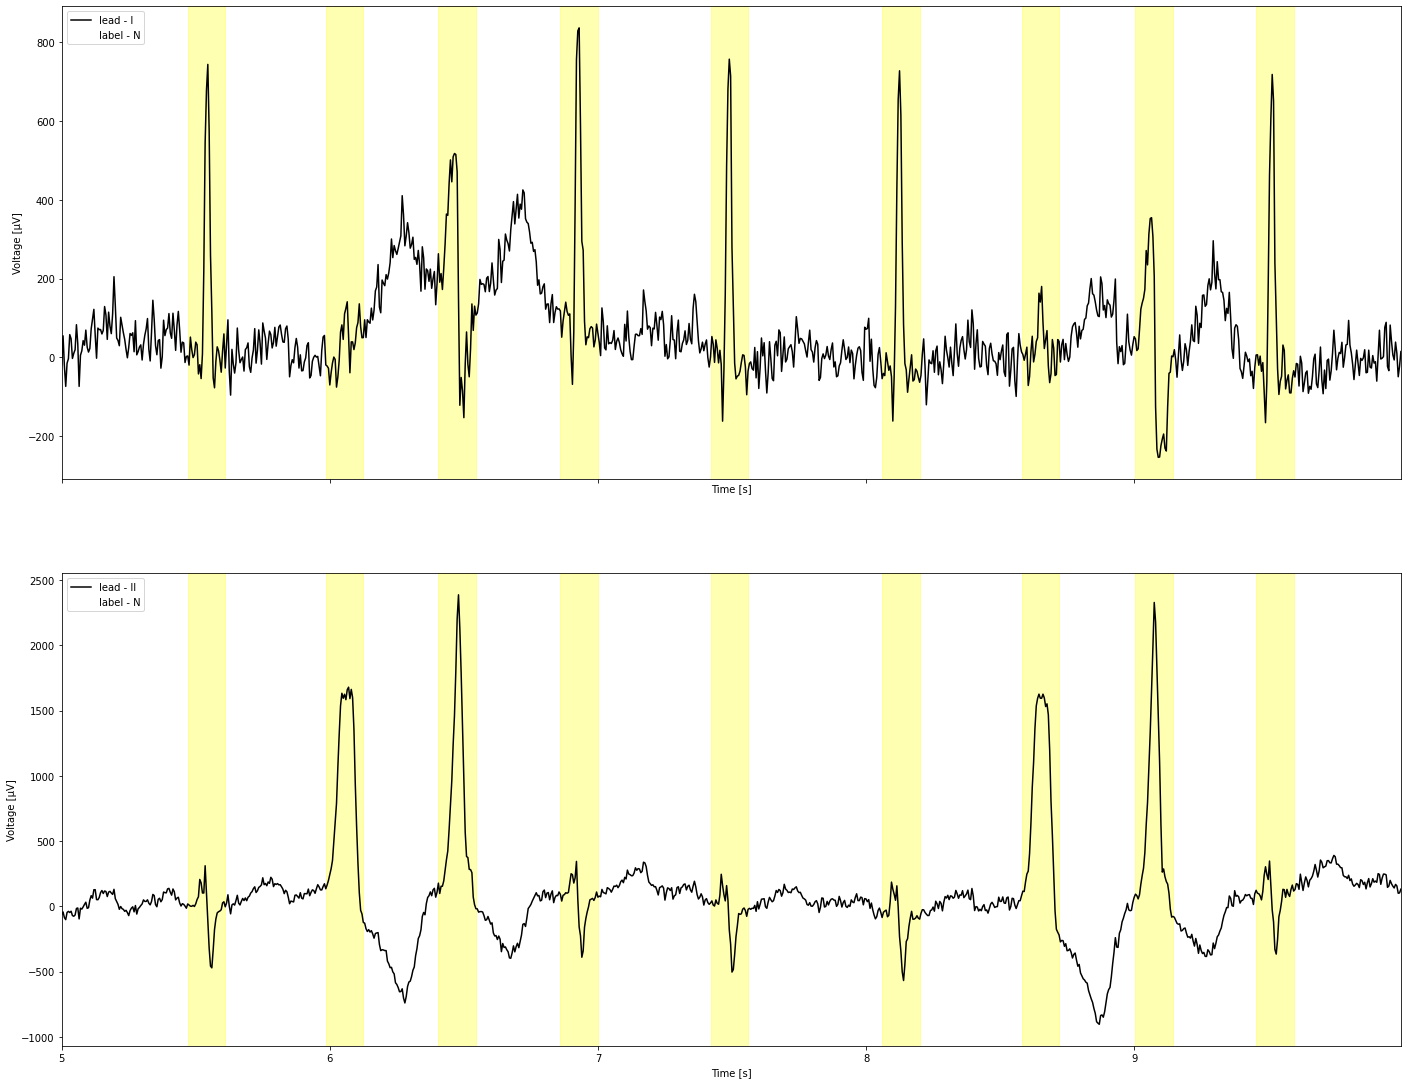

In [18]:
dr.plot(rec, sampfrom=1000, sampto=2000)

### AFp

In [19]:
rec = dr.diagnoses_records_list["AFp"][42]
rec

'data_32_12'

In [20]:
hehe_data = dr.load_data(rec)

hehe_data.shape

(2, 679269)

In [21]:
dr._get_path(rec)

'/home/wenh06/Jupyter/data/CPSC2021/training_I/data_32_12'

In [22]:
dr.load_ann(rec)

{'rpeaks': array([    30,    164,    324, ..., 678948, 679094, 679239]),
 'af_episodes': [[0, 670505]],
 'label': 'AFp'}

In [23]:
dr.load_label(rec, fmt="f"), dr.load_label(rec, fmt="a"), dr.load_label(rec, fmt="n")

('paroxysmal atrial fibrillation', 'AFp', 2)

In [24]:
hehe_rpeaks = dr.load_rpeaks(rec)
hehe_rpeaks.shape

(3860,)

In [25]:
dr.load_rpeaks(rec, sampfrom=1000, zero_start=True)

array([    63,    179,    306, ..., 677948, 678094, 678239])

In [26]:
dr.load_af_episodes(rec, fmt="intervals")

[[0, 670505]]

In [27]:
dr.load_af_episodes(rec, fmt="c_intervals")

[[0, 3802]]

In [28]:
hehe_mask = dr.load_af_episodes(rec, fmt="mask")

hehe_mask.shape

(679269,)

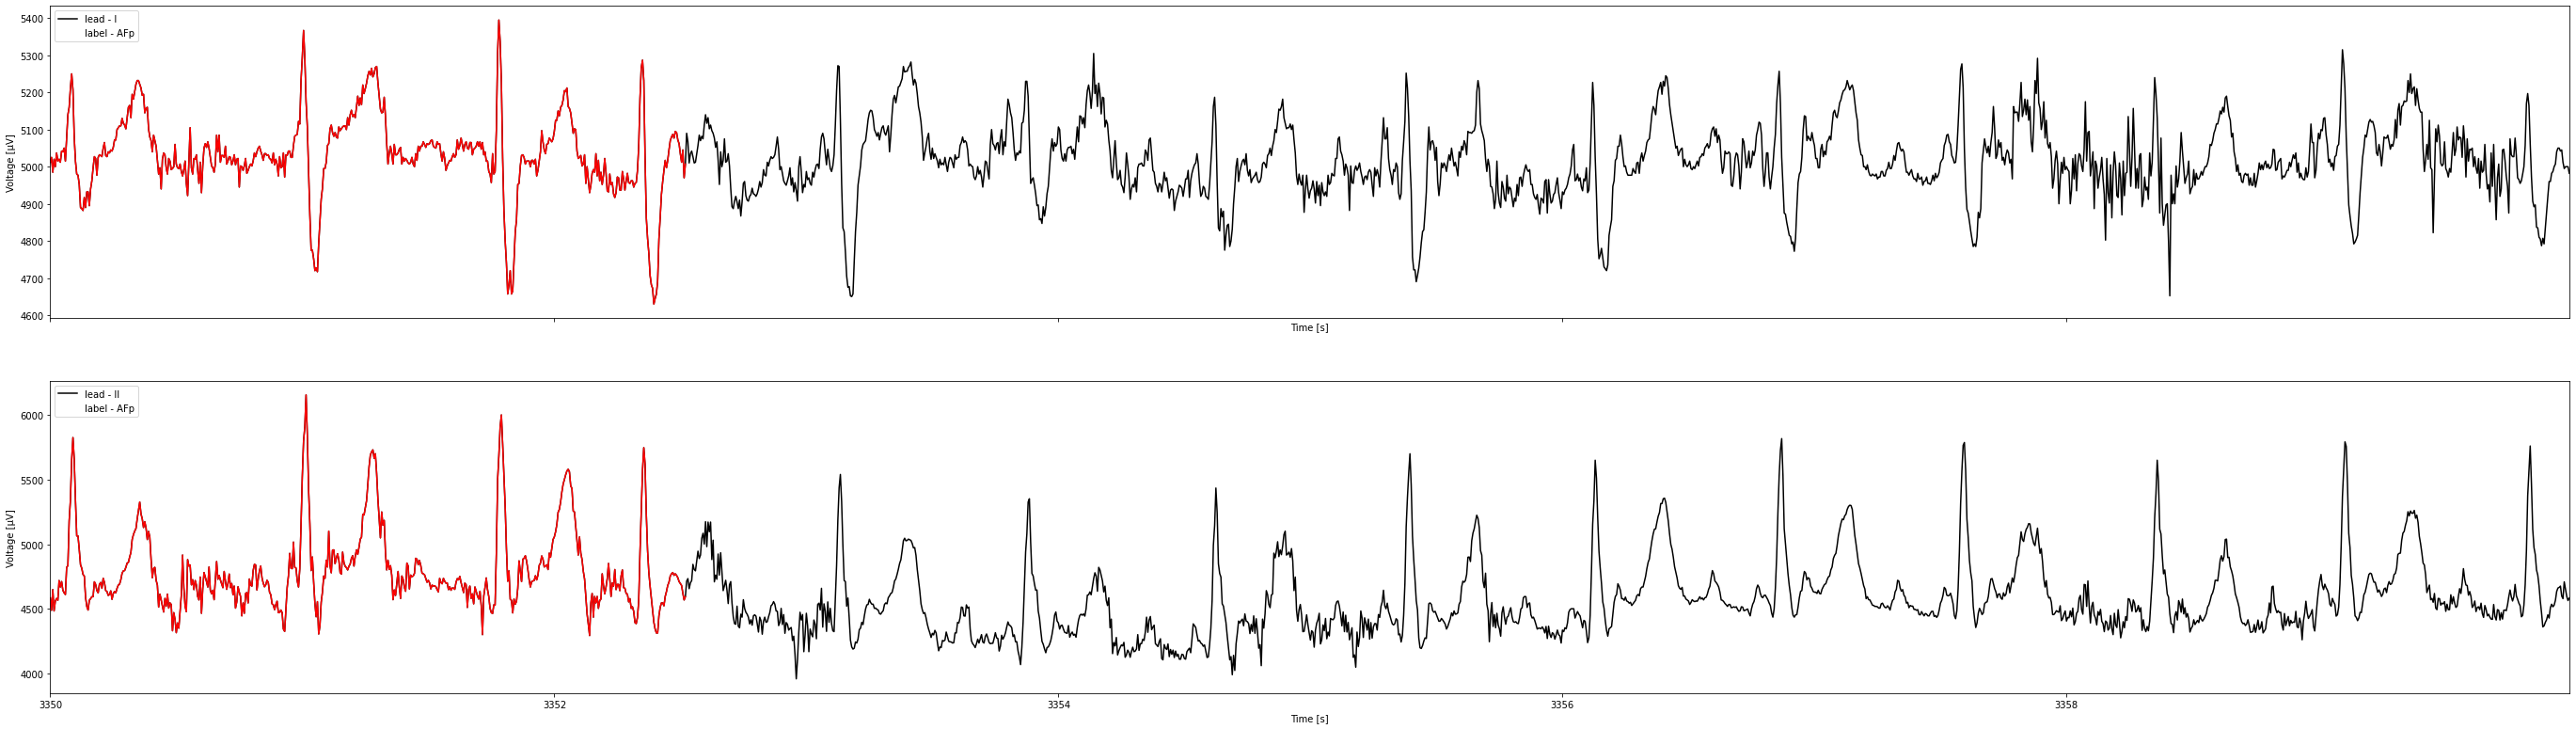

In [29]:
dr.plot(rec, sampfrom=670000, sampto=672000)

### AFf

In [30]:
rec = dr.diagnoses_records_list["AFf"][42]

rec

'data_11_5'

In [31]:
dr.load_ann(rec)

{'rpeaks': array([    30,    164,    380, ..., 958910, 959146, 959365]),
 'af_episodes': [[0, 959394]],
 'label': 'AFf'}

In [32]:
dr.load_label(rec, fmt="f"), dr.load_label(rec, fmt="a"), dr.load_label(rec, fmt="n")

('persistent atrial fibrillation', 'AFf', 1)

In [33]:
hehe_rpeaks = dr.load_rpeaks(rec)
hehe_rpeaks.shape

(5153,)

In [34]:
dr.load_rpeaks(rec, sampfrom=100, zero_start=True)

array([    64,    280,    399, ..., 958810, 959046, 959265])

In [35]:
dr.load_af_episodes(rec, fmt="intervals")

[[0, 959394]]

In [36]:
dr.load_af_episodes(rec, fmt="c_intervals")

[[0, 5154]]

In [37]:
hehe_mask = dr.load_af_episodes(rec, fmt="mask")

hehe_mask.shape

(959395,)

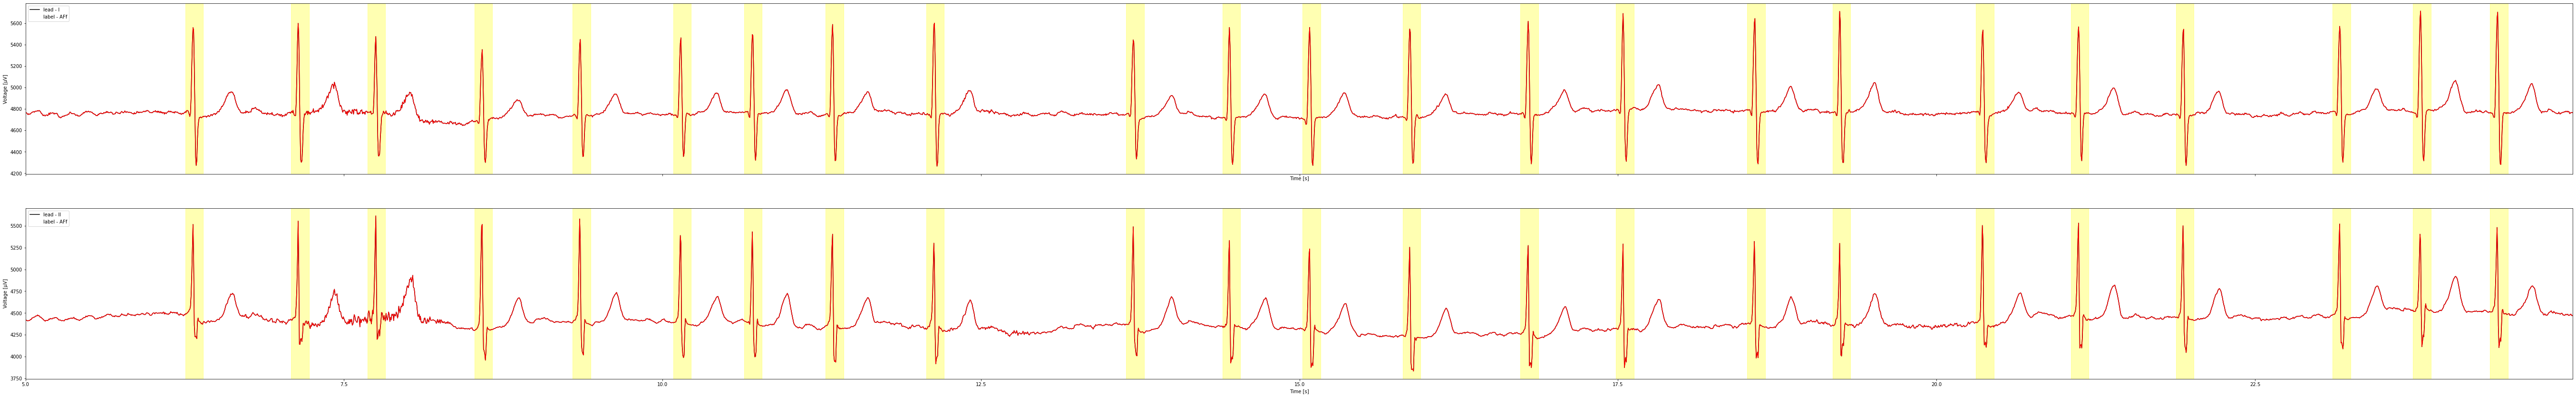

In [38]:
dr.plot(rec, sampfrom=1000, sampto=5000)

# utils check

In [39]:
from utils.utils_signal import get_ampl, ensure_siglen

In [40]:
get_ampl(dr.load_data(rec), fs=dr.fs, critical_points=dr.load_rpeaks(rec))

array([2.73484, 4.46698])

In [41]:
get_ampl(dr.load_data(rec), fs=dr.fs)

array([3.31188, 5.96   ])

# check custom scoring metrics

In [42]:
from utils.scoring_metrics_test import run_test, run_single_test

In [43]:
# ?run_test

In [44]:
l_rec = [dr._get_path(rec) for rec in dr.all_records]

In [ ]:
run_test(l_rec)

In [45]:
rec = "data_39_4"

In [53]:
run_single_test(dr._get_path(rec), verbose=2)

-----  data_39_4 starts ------

record = data_39_4,
class = paroxysmal atrial fibrillation,

0 added to critical_points
siglen (=90557) appended to critical_points
custom --- onset (c_ind, score 1): 67 --- 70
custom --- onset (sample, score 1): 10816 --- 11033
[68, 78]
79 612
custom --- offset (c_ind, score 1): 76 --- 79
custom --- offset (sample, score 1): 11757 --- 12154
custom --- onset (c_ind, score 1): 138 --- 141
custom --- onset (sample, score 1): 21917 --- 22134
[139, 341]
342 612
custom --- offset (c_ind, score 1): 339 --- 342
custom --- offset (sample, score 1): 48551 --- 48906
custom --- onset (c_ind, score 1): 411 --- 414
custom --- onset (sample, score 1): 60670 --- 60893
[412, 474]
475 612
custom --- offset (c_ind, score 1): 472 --- 475
custom --- offset (sample, score 1): 68247 --- 68547
custom --- onset (c_ind, score 1): 593 --- 596
custom --- onset (sample, score 1): 88501 --- 88716
[594, 609]
610 612
custom --- offset (c_ind, score 1): 607 --- 610
custom --- offset (s

False

In [47]:
ref_info = RefInfo(dr._get_path(rec))
c_mask = ref_info._gen_endpoint_score_range()

In [48]:
ref_info._load_ref()

(200,
 90557,
 array([   30,   187,   351,   514,   676,   832,   995,  1153,  1317,
         1476,  1639,  1796,  1960,  2122,  2282,  2449,  2608,  2771,
         2934,  3087,  3249,  3408,  3569,  3730,  3889,  4052,  4220,
         4381,  4541,  4708,  4870,  5031,  5192,  5356,  5518,  5677,
         5839,  6000,  6161,  6321,  6487,  6651,  6812,  6978,  7144,
         7310,  7473,  7639,  7807,  7973,  8144,  8311,  8475,  8646,
         8812,  8978,  9146,  9312,  9480,  9648,  9813,  9982, 10150,
        10313, 10485, 10650, 10816, 10872, 10902, 11033, 11169, 11289,
        11397, 11525, 11623, 11757, 11912, 11942, 12154, 12315, 12497,
        12674, 12848, 13017, 13184, 13355, 13523, 13690, 13859, 14024,
        14193, 14363, 14531, 14698, 14866, 15033, 15197, 15365, 15530,
        15695, 15858, 16024, 16187, 16357, 16520, 16686, 16852, 17014,
        17184, 17348, 17513, 17678, 17843, 18007, 18174, 18337, 18498,
        18663, 18826, 18984, 19148, 19310, 19469, 19631, 19798,

In [49]:
wfdb.rdann(dr._get_path(rec),extension=dr.ann_ext).sample

array([   30,   187,   351,   514,   676,   832,   995,  1153,  1317,
        1476,  1639,  1796,  1960,  2122,  2282,  2449,  2608,  2771,
        2934,  3087,  3249,  3408,  3569,  3730,  3889,  4052,  4220,
        4381,  4541,  4708,  4870,  5031,  5192,  5356,  5518,  5677,
        5839,  6000,  6161,  6321,  6487,  6651,  6812,  6978,  7144,
        7310,  7473,  7639,  7807,  7973,  8144,  8311,  8475,  8646,
        8812,  8978,  9146,  9312,  9480,  9648,  9813,  9982, 10150,
       10313, 10485, 10650, 10816, 10872, 10902, 11033, 11169, 11289,
       11397, 11525, 11623, 11757, 11912, 11942, 12154, 12315, 12497,
       12674, 12848, 13017, 13184, 13355, 13523, 13690, 13859, 14024,
       14193, 14363, 14531, 14698, 14866, 15033, 15197, 15365, 15530,
       15695, 15858, 16024, 16187, 16357, 16520, 16686, 16852, 17014,
       17184, 17348, 17513, 17678, 17843, 18007, 18174, 18337, 18498,
       18663, 18826, 18984, 19148, 19310, 19469, 19631, 19798, 19958,
       20121, 20286,

In [50]:
dr.df_stats[dr.df_stats.record==rec].iloc[0]["sig_len"]

90557

In [51]:
dr.load_af_episodes(rec, fmt="c_intervals")

[[67, 77], [138, 340], [411, 473], [593, 608]]

In [ ]:
o_mask = gen_endpoint_score_mask(
    siglen=dr.df_stats[dr.df_stats.record==rec].iloc[0]["sig_len"],
    critical_points=wfdb.rdann(dr._get_path(rec),extension=dr.ann_ext).sample,
    af_intervals=dr.load_af_episodes(rec, fmt="c_intervals")
)

In [ ]:
dr.df_stats[dr.df_stats.record==rec].iloc[0].sig_len

In [ ]:
o_mask

In [ ]:
wfdb.rdann(dr._get_path(rec),extension=dr.ann_ext).__dict__

In [ ]:
dr.gen_endpoint_score_mask(rec)